<a href="https://colab.research.google.com/github/alvafox/Aprendizaje-supervizado/blob/main/CountVectorizer_(OE)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificador de Objetivos de Estudio (SVC)**
---


In [2]:
# importar bibliotecas
import numpy as np
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 

In [3]:
!pip install ftfy
import ftfy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 2.9 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
import pandas as pd
df = pd.read_csv("/gdrive/MyDrive/INSUMOS/DOCTORADOS (2021-2023).csv", sep=";",encoding="latin1")
df = df.fillna("-")
df

,AÑO,FOLIO,COMITÉ INICIAL (TP),COMITÉ DEFINITIVO (L2),OBJETIVO,PROGRAMA,PALABRAS 1,PALABRAS 2,PALABRAS 3
0,2021,21210001,Ecología y Ciencias Naturales,Ecología y Ciencias Naturales,"Contaminación, tecnología y remediación del ag...",Doctorado en Ciencias Ambientales mención Sist...,"2513 Ciencias Ambientales - 1 Tratamiento, dep...",2513 Ciencias Ambientales - 18 Gestión de resi...,-
1,2021,21210002,Cs. de la Ingeniería II,Cs. de la Ingeniería II,La pérdida de piezas dentales afecta la calida...,Doctorado en Ingeniería Metalúrgica,3312 Tecnología de materiales - 12 Ensayos de ...,3315 Tecnología metalúrgica - 11 Pulvimetalurgia,-
2,2021,21210003,Biología Celular y Molecular,Biología Celular y Molecular,La lesión de médula espinal (LME) es una condi...,Doctorado en Ciencias Biológicas mención Biolo...,2407 Biología celular - 01 Cultivo celular,2407 Biología celular - 05 Cultivo de tejidos,2407 Biología celular - 06 Regeneración tisular
3,2021,21210004,Cs. Políticas y Estudios Internacionales,Derecho,La evaluación del cumplimiento efectivo que se...,Doctorado en Ciencia Política,5905 Política Comparada - 01 Instituciones Pol...,-,-
4,2021,21210005,Administración,Administración,1.- Debido al rol que cumplen las IES en la fo...,Doctorado en Ciencias Humanas,"6103 Psicología industrial, del trabajo y de l...",-,-
...,...,...,...,...,...,...,...,...,...
6225,2023,21232432,Biotecnología,Biotecnología,La flavobacteriosis es una enfermedad provocad...,Doctorado en Biotecnología,"2412 Inmunología (ver 2302.16, 3109.03, 3207.1...","2412 Inmunología (ver 2302.16, 3109.03, 3207.1...",-
6226,2023,21232435,Filosofía,Filosofía,Mi objetivo de estudio consiste en elaborar un...,Doctorado en Filosofía con mención en Filosofía,7201 Filosofía del conocimiento - 02 Epistemol...,7202 Antropología filosófica - 07 Filosofía de...,7207 Filosofía social - 01 Filosofia de la cul...
6227,2023,21232438,Derecho,Derecho,\r\nEstoy desarrollando mi investigación de D...,Doctorado en Derecho,5699 Otras especialidades jurídicas - otras,-,-
6228,2023,21232439,Agronomía y Forestal,Agronomía y Forestal,La tesis se alinea con el objetivo del program...,Doctorado en Ciencias de la Agricultura,3103 Agronomía (ver 2417 y 5312.01 ) - 04 Prot...,3103 Agronomía (ver 2417 y 5312.01 ) - 05 Técn...,-


In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('spanish'))
print(stopwords)
stopwords.update(["embargo", "además", "través", "estudio", "mediante", "propuesta", "debido", "investigación", \
                  "chile", "proceso", "objetivo", "desarrollo", "trabajo", "así", "forma", "línea", "contexto", "tipo",\
                  "importante", "diferente", "posible", "manera", "dentro", "sido", "ello", "sistema", "modelo", "uso",\
                  "parte", "efecto", "proyecto", "problema", "estudios", "análisis","procesos", "área", "parte", \
                  "producción", "conocimiento", "relación", "año", "caso", "dato", "datos", "cambio", "sistemas", \
                  "resultado", "partir", "base", "grupo", "diferentes", "estructura", "mecanismo", "evaluar",\
                  "doctorado", "ejemplo", "cuales", "analizar", "impacto", "siendo", "si", "pueden", "frente",\
                  "método", "mayor", "actualmente", "existe", "principalmente", "presente", "gran", "solo", "punto",\
                  "bien", "sino", "años", "lado", "fin", "basado", "ser", "puede", "respecto", "vez", "mismo", "estudiar",\
                  "formación", "información", "país", "tiempo", "teoría", "interés", "determinar", "desarrollar", "resultados"\
                  "persona", "último", "cómo", "condicione", "medio", "respuesta", "estrategia", "general", "nivel", "programa",\
                  "experiencia", "bajo", "control", "producto", "capacidad", "nuevo", "nueva", "enfoque", "aporte", "problemas",\
                  "factores", "generar", "cabo", "debe", "podría", "realizar", "cada", "rol", "et", "and"])

stopwords= list(stopwords)
print(stopwords)


def clean(doc): # doc is a string of text
    doc = ftfy.fix_text(doc)
    doc = doc.replace("</br>", " ") # This text contains a lot of <br/> tags.
    doc = doc.replace("\n", " ") 
    doc = doc.replace("\n\n", " ") 
    doc = doc.replace("\n\n\n", " ") 
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # remove punctuation and numbers
    return doc

{'fuiste', 'estando', 'estás', 'sentidas', 'suyas', 'estén', 'una', 'tienes', 'estuvisteis', 'su', 'estarían', 'ese', 'vuestra', 'tenido', 'seamos', 'mío', 'no', 'al', 'habido', 'y', 'ni', 'esté', 'has', 'estar', 'tenía', 'estuvieses', 'tuviste', 'tengamos', 'esto', 'o', 'nuestro', 'tú', 'estos', 'fue', 'teníamos', 'estuvieran', 'vosotras', 'vosotros', 'esas', 'habría', 'tendrán', 'tendríais', 'tendréis', 'estuvieron', 'qué', 'suyo', 'estaríamos', 'hayan', 'fueron', 'tuviera', 'estadas', 'estaremos', 'estas', 'tiene', 'hubieseis', 'él', 'fueran', 'hemos', 'nos', 'fueseis', 'habremos', 'tuviéramos', 'estaban', 'hay', 'este', 'fui', 'tuvierais', 'serán', 'los', 'estuvo', 'de', 'del', 'está', 'sea', 'le', 'nosotros', 'estarías', 'fuisteis', 'ellas', 'estáis', 'tuvieras', 'estemos', 'hubieras', 'estad', 'mi', 'estuve', 'la', 'ya', 'serían', 'les', 'estaré', 'habían', 'sí', 'sois', 'seremos', 'tenían', 'hubimos', 'tengo', 'ante', 'tienen', 'esos', 'estuviésemos', 'fuera', 'estuviese', 'que'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
# preparar los datos
# Seleccionar las características
labels = df["COMITÉ DEFINITIVO (L2)"]
features = df["PROGRAMA"] + " " + df["OBJETIVO"] + " " + df["PALABRAS 1"]


objetivos = df["OBJETIVO"]
programas = df["PROGRAMA"]
comites_antes = df["COMITÉ INICIAL (TP)"]
palabras_uno = df["PALABRAS 1"]
palabras_dos = df["PALABRAS 2"]
palabras_tres = df["PALABRAS 3"]

A continuación, utilizamos la técnica de Bolsa de Palabras para extraer características de los objetivos de estudio

In [10]:
# Vectorizar las características de texto
vectorizer = CountVectorizer(preprocessor=clean)

X = vectorizer.fit_transform(features).toarray()

from sklearn.preprocessing import normalize
X_normalized = normalize(X, norm='l2')

#objetivos_vec = vectorizer.fit_transform(objetivos).toarray()
#programas_vec = vectorizer.fit_transform(programas).toarray()
#palabras_uno_vec = vectorizer.fit_transform(palabras_uno).toarray()


#from sklearn.preprocessing import normalize

#X_normalized = normalize(X, norm='l2')
#palabras_dos_vec = vectorizer.fit_transform(palabras_dos).toarray()
#palabras_tres_vec = vectorizer.fit_transform(palabras_tres).toarray()
#comites_antes_vec = vectorizer.fit_transform(comites_antes)

caracteristicas = X_normalized 
#caracteristicas = np.hstack((objetivos_vec, programas_vec))
caracteristicas.shape

(6230, 98200)

En este código, utilizamos CountVectorizer para convertir los objetivos de estudio en una matriz de características de Bolsa de Palabras. La función fit_transform ajusta el vectorizador a los datos de entrada y luego lo utiliza para transformar los objetivos de estudio en una matriz de características. La función toarray convierte la matriz de características en un arreglo NumPy.

Después, dividimos los datos en conjuntos de entrenamiento y prueba:

In [11]:
# dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(caracteristicas, labels, test_size=0.2, random_state=42)

Seleccionamos el modelo y lo entrenamos:

In [12]:
# seleccionar el modelo
model = SVC(kernel='linear')

In [13]:
import time

start = time.time()

# entrenar el modelo
model.fit(X_train, y_train)

end = time.time()

total = end - start
print("Tiempo transcurrido:", round(total/60,2), "minutos")

Tiempo transcurrido: 48.94 minutos


Finalmente, evaluamos el modelo y hacemos una predicción utilizando un nuevo objetivo de estudio:

In [14]:
# Realizar predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 80.66%


In [15]:
comites = list(df["COMITÉ DEFINITIVO (L2)"].unique())
comites.sort()
display(comites)

['Administración',
 'Agronomía y Forestal',
 'Arquitectura',
 'Arte',
 'Biología Celular y Molecular',
 'Biología Fisiológica y Bioquímica',
 'Biotecnología',
 'Computación e Informática',
 'Comunicación',
 'Cs. Matemáticas',
 'Cs. Médicas',
 'Cs. Políticas y Estudios Internacionales',
 'Cs. Químicas',
 'Cs. Veterinarias',
 'Cs. de la Ingeniería I',
 'Cs. de la Ingeniería II',
 'Derecho',
 'Diseño',
 'Ecología y Ciencias Naturales',
 'Economía',
 'Educación I',
 'Educación II',
 'Filosofía',
 'Física y Astronomía',
 'Geología y Oceanografía',
 'Historia, Antropología y Arqueología',
 'Letras',
 'Políticas Públicas y Administración del Estado',
 'Psicología',
 'Sociología',
 'Urbanismo y Asentamientos Humanos']

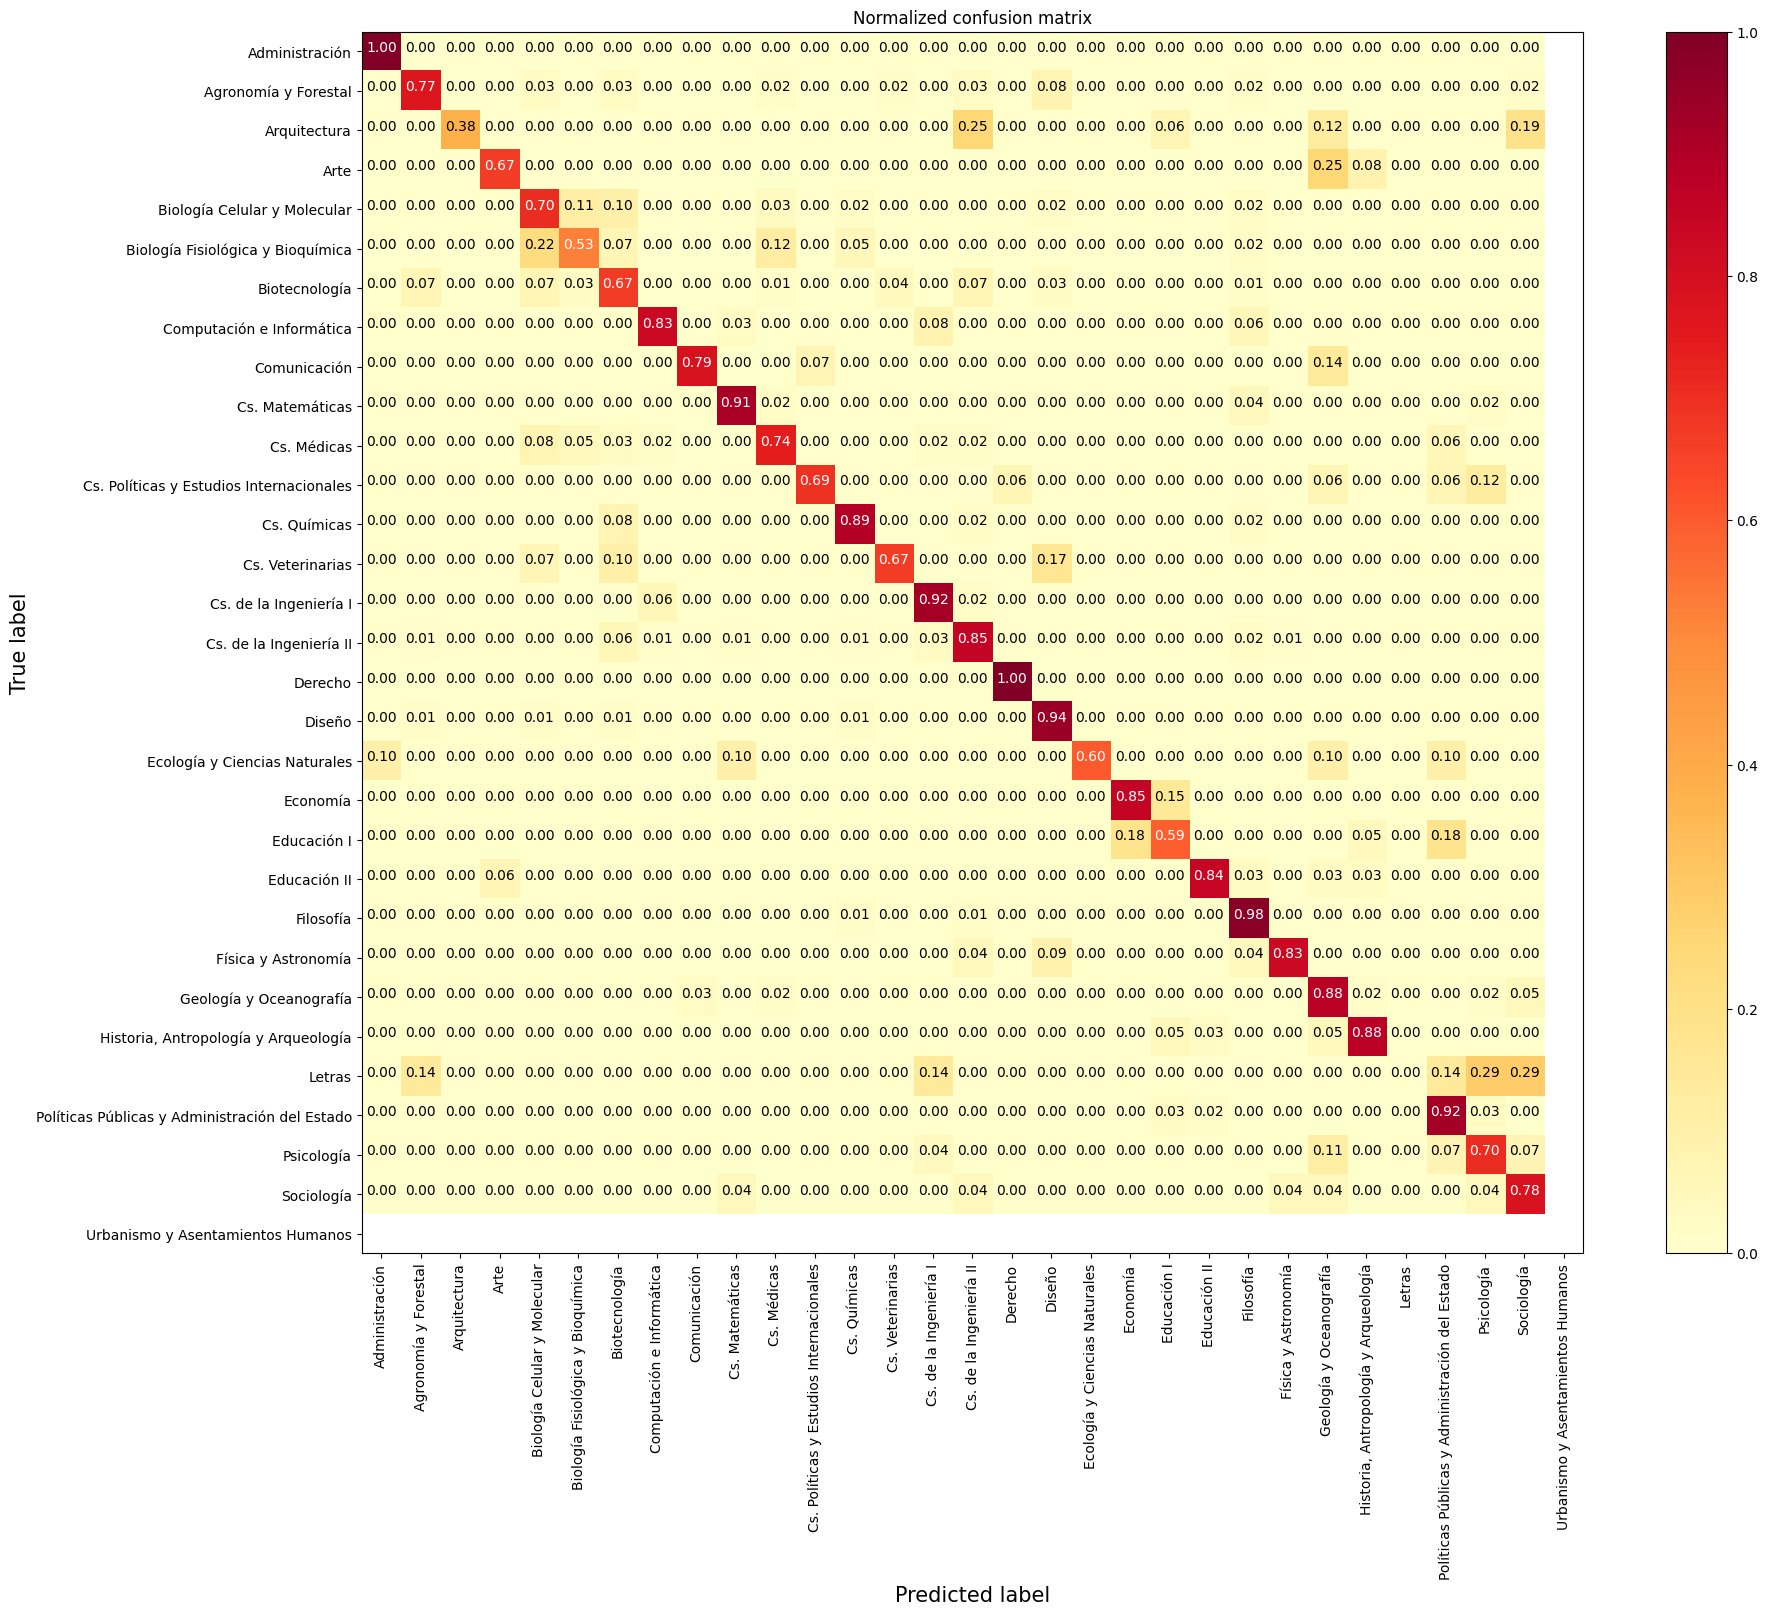

In [16]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.YlOrRd):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Ajustar los límites de los ejes x e y
    plt.xlim(-0.5, len(classes)-0.5)
    plt.ylim(len(classes)-0.5, -0.5)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)

# Ejemplo de uso:
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,16))
plot_confusion_matrix(cnf_matrix, classes=comites, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [ ]:
# calculate AUC: Area under the curve(AUC) gives idea about the model efficiency:
# Further information: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
#cleaner = np.vectorize(clean)
#X_test_clean = cleaner(list(X_test))
#X_test_dtm = vectorizer.transform(X_test_clean)
#y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
#print("ROC_AOC_Score: ", roc_auc_score(y_test, y_pred_prob))

In [18]:
n = 5687

print("COMITÉ INICIAL (TP) =>", df["COMITÉ INICIAL (TP)"][n])

print("COMITÉ DEFINITIVO (L2) =>", df["COMITÉ DEFINITIVO (L2)"][n])

print("PROGRAMA =>",df["PROGRAMA"][n])

print("OBJETIVO =>",df["OBJETIVO"][n])

COMITÉ INICIAL (TP) => Psicología
COMITÉ DEFINITIVO (L2) => Psicología
PROGRAMA => Doctorado en Salud Mental
OBJETIVO => Mi objetivo de estudio y línea de investigación siguen la temática asociada a mi proyecto de tesis doctoral, ya aprobado, titulado Modelo explicativo sobre el efecto de la relación docente - estudiante y el respeto basado en la igualdad sobre el compromiso escolar y la sintomatología depresiva de estudiantes entre 10 y 14 años de origen mapuche residentes de la provincia de Cautín. 
La educación de estudiantes mapuche en nuestro país se enmarca en un contexto de mayor vulnerabilidad en comparación al de estudiantes no indígenas (Becerra et al., 2015). Diversas son las brechas que podemos mencionar; concentración primaria en establecimientos con peores resultados educativos, asimetría y conflictos de reconocimiento social tanto a nivel individual como estructural, falta de estrategias de afrontamiento para problemas psicoeducativos con un enfoque étnico, entre mucha

In [36]:
# ajustar el vectorizador en todo el conjunto de datos
vectorizer.fit(df["PROGRAMA"] + " " + df["OBJETIVO"] + " " + df["PALABRAS 1"])

# para cada fila en el dataframe, transformar el texto a vector y predecir
for index, row in df.iterrows():
    texto = [row["PROGRAMA"] + " " + row["OBJETIVO"] + " " + row["PALABRAS 1"]]
    X = vectorizer.transform(texto).toarray()
    X_normalized = normalize(X, norm='l2')
    comite_predicho = model.predict(X_normalized)
    df.at[index, "COMITÉ SUGERIDO (DecisionTreeClassifier)"] = comite_predicho

In [37]:
df

,AÑO,FOLIO,COMITÉ INICIAL (TP),COMITÉ DEFINITIVO (L2),OBJETIVO,PROGRAMA,PALABRAS 1,PALABRAS 2,PALABRAS 3,COMITÉ SUGERIDO (DecisionTreeClassifier)
0,2021,21210001,Ecología y Ciencias Naturales,Ecología y Ciencias Naturales,"Contaminación, tecnología y remediación del ag...",Doctorado en Ciencias Ambientales mención Sist...,"2513 Ciencias Ambientales - 1 Tratamiento, dep...",2513 Ciencias Ambientales - 18 Gestión de resi...,-,[Ecología y Ciencias Naturales]
1,2021,21210002,Cs. de la Ingeniería II,Cs. de la Ingeniería II,La pérdida de piezas dentales afecta la calida...,Doctorado en Ingeniería Metalúrgica,3312 Tecnología de materiales - 12 Ensayos de ...,3315 Tecnología metalúrgica - 11 Pulvimetalurgia,-,[Cs. de la Ingeniería II]
2,2021,21210003,Biología Celular y Molecular,Biología Celular y Molecular,La lesión de médula espinal (LME) es una condi...,Doctorado en Ciencias Biológicas mención Biolo...,2407 Biología celular - 01 Cultivo celular,2407 Biología celular - 05 Cultivo de tejidos,2407 Biología celular - 06 Regeneración tisular,[Biología Celular y Molecular]
3,2021,21210004,Cs. Políticas y Estudios Internacionales,Derecho,La evaluación del cumplimiento efectivo que se...,Doctorado en Ciencia Política,5905 Política Comparada - 01 Instituciones Pol...,-,-,[Derecho]
4,2021,21210005,Administración,Administración,1.- Debido al rol que cumplen las IES en la fo...,Doctorado en Ciencias Humanas,"6103 Psicología industrial, del trabajo y de l...",-,-,[Administración]
...,...,...,...,...,...,...,...,...,...,...
6225,2023,21232432,Biotecnología,Biotecnología,La flavobacteriosis es una enfermedad provocad...,Doctorado en Biotecnología,"2412 Inmunología (ver 2302.16, 3109.03, 3207.1...","2412 Inmunología (ver 2302.16, 3109.03, 3207.1...",-,[Cs. Veterinarias]
6226,2023,21232435,Filosofía,Filosofía,Mi objetivo de estudio consiste en elaborar un...,Doctorado en Filosofía con mención en Filosofía,7201 Filosofía del conocimiento - 02 Epistemol...,7202 Antropología filosófica - 07 Filosofía de...,7207 Filosofía social - 01 Filosofia de la cul...,[Filosofía]
6227,2023,21232438,Derecho,Derecho,\r\nEstoy desarrollando mi investigación de D...,Doctorado en Derecho,5699 Otras especialidades jurídicas - otras,-,-,[Derecho]
6228,2023,21232439,Agronomía y Forestal,Agronomía y Forestal,La tesis se alinea con el objetivo del program...,Doctorado en Ciencias de la Agricultura,3103 Agronomía (ver 2417 y 5312.01 ) - 04 Prot...,3103 Agronomía (ver 2417 y 5312.01 ) - 05 Técn...,-,[Agronomía y Forestal]


In [38]:
df.to_csv("PREDICCIONES.csv", sep=";",encoding="latin1")

In [39]:
from google.colab import files
files. download("PREDICCIONES.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>